# Data Scientist Coding Exercise

This coding exercise was proposed by a provider of green energy (electricity and gas). 


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Member-Referrals" data-toc-modified-id="Member-Referrals-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Member Referrals</a></span><ul class="toc-item"><li><span><a href="#Read-data-and-make-sanity-check" data-toc-modified-id="Read-data-and-make-sanity-check-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Read data and make sanity check</a></span></li><li><span><a href="#First-exploration-of-data" data-toc-modified-id="First-exploration-of-data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>First exploration of data</a></span></li></ul></li><li><span><a href="#Exercise" data-toc-modified-id="Exercise-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exercise</a></span><ul class="toc-item"><li><span><a href="#When-do-member-refer-?" data-toc-modified-id="When-do-member-refer-?-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>When do member refer ?</a></span><ul class="toc-item"><li><span><a href="#SQL-in-python-:-create-new-database-with-referrer-and-referred-information" data-toc-modified-id="SQL-in-python-:-create-new-database-with-referrer-and-referred-information-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>SQL in python : create new database with referrer and referred information</a></span></li><li><span><a href="#Data-exploration" data-toc-modified-id="Data-exploration-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Data exploration</a></span></li></ul></li><li><span><a href="#Does-the-channel-members-are-acquired-from-significantly-impact-how-they-refer?-Do-you-think-we-need-a-larger-sample-size-to-be-sure?" data-toc-modified-id="Does-the-channel-members-are-acquired-from-significantly-impact-how-they-refer?-Do-you-think-we-need-a-larger-sample-size-to-be-sure?-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Does the channel members are acquired from significantly impact how they refer? Do you think we need a larger sample size to be sure?</a></span></li><li><span><a href="#We-can-send-an-email-to-members-to-invite-them-to-refer-their-friends.-We-can-choose-when,-and-to-whom,-we-send-the-emails.-How-would-you-suggest-we-proceed?" data-toc-modified-id="We-can-send-an-email-to-members-to-invite-them-to-refer-their-friends.-We-can-choose-when,-and-to-whom,-we-send-the-emails.-How-would-you-suggest-we-proceed?-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>We can send an email to members to invite them to refer their friends. We can choose when, and to whom, we send the emails. How would you suggest we proceed?</a></span><ul class="toc-item"><li><span><a href="#First-actions-:" data-toc-modified-id="First-actions-:-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>First actions :</a></span></li><li><span><a href="#To-go-futher-:" data-toc-modified-id="To-go-futher-:-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>To go futher :</a></span></li></ul></li></ul></li></ul></div>


## Member Referrals

The CEO has come to your desk and explained that we want to increase signups from our referral scheme. As part of this effort, we are keen to understand at what point in the member lifecycle members refer other people. 

There are 2 CSV files attached to your email that contain information on our customers and their referral behaviour:

   - The Customer Info CSV contains information on customers and metadata for each customer. It is a representative sample of the whole customer database
   - The Referral Info CSV is a log of sign-ups we have received from the referral channel


 ### Read data and make sanity check

In [1]:
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings("ignore")

import plotly.io as pio
pio.renderers.default= 'png'# to export on git and have plot shown : to have interactive = 'notebook'
pio.renderers["png"].height = 600
pio.renderers["png"].width = 900


In [2]:
# Load data and verify 
customer = pd.read_csv('180601_Customer_Info.csv')
referrals = pd.read_csv('180601_Referrals_Info.csv')

In [3]:
customer.describe()

customer_id
count  1699.000000
mean   1558.110065
std     987.688691
min       0.000000
25%     516.500000
50%    2004.000000
75%    2428.500000
max    2853.000000

In [4]:
customer.dtypes

customer_id         int64
sign_up_date       object
sign_up_channel    object
dtype: object

In [5]:
customer['sign_up_date']=pd.to_datetime(customer.sign_up_date, format="%Y-%m-%d")

In [6]:
customer.isna().sum()


customer_id        0
sign_up_date       0
sign_up_channel    0
dtype: int64

In [7]:
customer.duplicated().sum()

0

In [8]:
referrals.describe()

referrer_customer_id  sign_up_customer_id
count           1000.000000          1000.000000
mean             394.307000          1356.003000
std              263.132589           297.646909
min                0.000000           260.000000
25%              154.750000          1109.750000
50%              379.500000          1359.500000
75%              622.250000          1609.250000
max              868.000000          1859.000000

In [9]:
referrals.isna().sum()

referral_date           0
referrer_customer_id    0
sign_up_customer_id     0
dtype: int64

In [10]:
referrals.duplicated().sum()

0

In [11]:
referrals['referral_date']=pd.to_datetime(referrals['referral_date'], format="%Y-%m-%d")

### First exploration of data

In [12]:
customer.head()

customer_id sign_up_date           sign_up_channel
0         2543   2021-04-26  Price Comparison Website
1         2181   2021-07-24                  Referral
2         2399   2020-10-11          Provider Website
3          674   2021-04-04                  Referral
4         2332   2021-09-05  Price Comparison Website

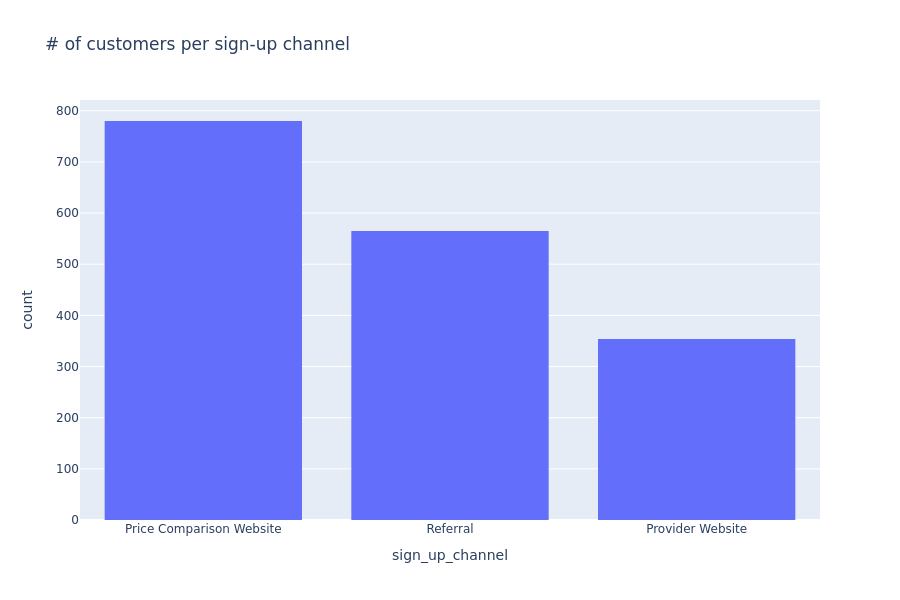

In [13]:
px.histogram(data_frame=customer, x='sign_up_channel', 
             title='# of customers per sign-up channel')

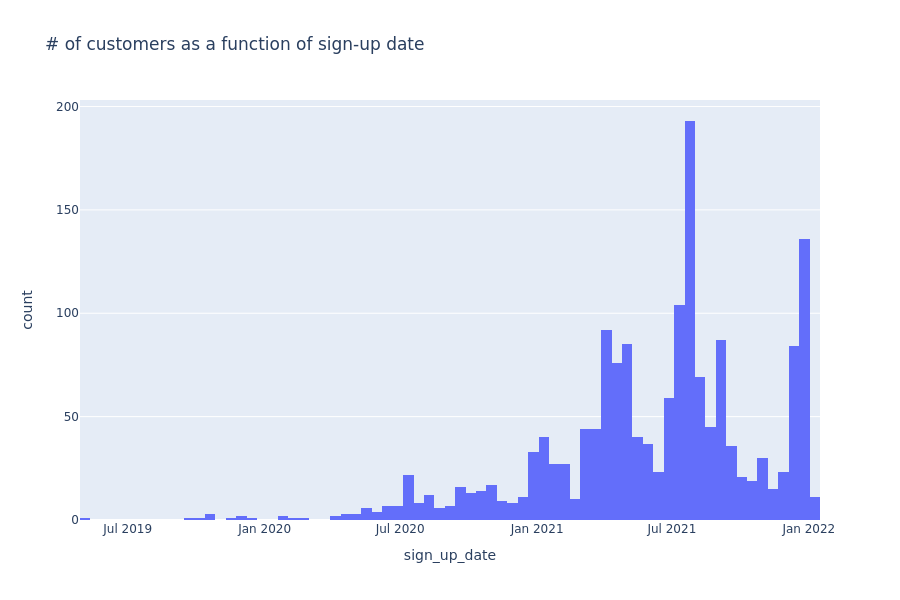

In [14]:
px.histogram(data_frame=customer, x='sign_up_date', title ='# of customers as a function of sign-up date')

In [15]:
referrals.head()

referral_date  referrer_customer_id  sign_up_customer_id
0    2021-07-18                   795                 1771
1    2021-04-12                   577                 1510
2    2021-07-07                   868                 1858
3    2021-10-25                   801                 1778
4    2021-08-15                   690                 1637

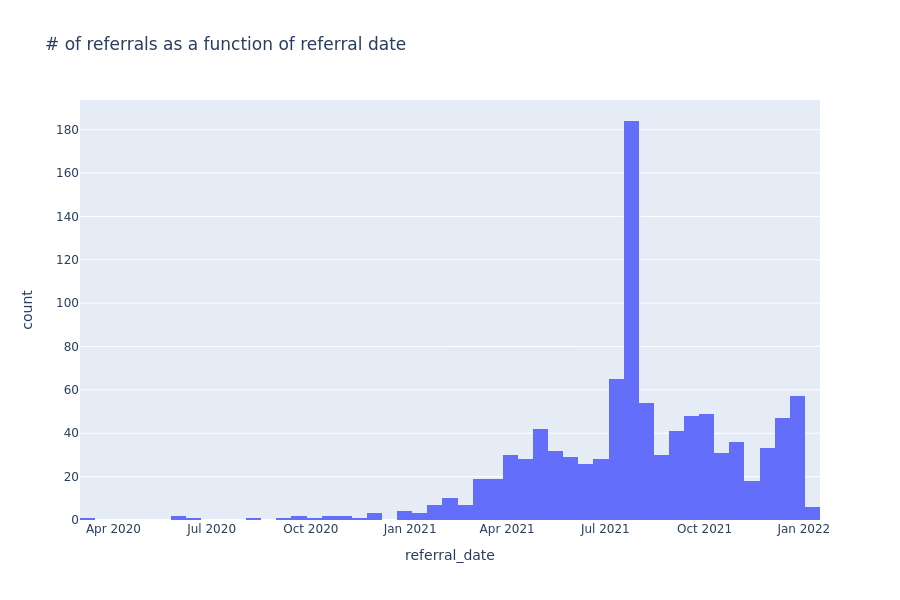

In [16]:
px.histogram(data_frame=referrals, x='referral_date', title ='# of referrals as a function of referral date')

Initial findings:
- The majority of users signed up through price comparison websites.
- A significant increase in sign-ups and referrals was observed in mid-July 2021, possibly attributed to a promotion, particularly one offering rewards for referrals.


## Exercise 

Use this information to answer the questions below:

 1. When do members refer? (Try to think about each member lifetime, starting from when they sign-up to the green energy provider. The number of green energy provider members is growing very quickly. A lot of green energy provider members have not been with green energy provider for very long. Think about how this might affect your conclusions.)
 2. Does the channel members are acquired from significantly impact how they refer? Do you think we need a larger sample size to be sure?
 3. We can send an email to members to invite them to refer their friends. We can choose when, and to whom, we send the emails. How would you suggest we proceed?
 
 
You should aim to spend 2-3 hours on this task. If you have to make some assumptions or leave some ‘future work’ in the interests of time, no problem, just make a note in your submission.

### When do member refer ? 

#### SQL in python : create new database with referrer and referred information 

Step 1: Create a Database
This will connect to an existing db or create a new one if not exists.

        conn = sql.connect('default.db')
        
        
Step 2: Export the DataFrame to the Database
Now, we will export the existing dataframe to the created database. The table name should be passed explicitly, as ‘sql_table’ here.

        df.to_sql('sql_table', conn)
        
        
Step 3: Start querying through SQL
Create the query to execute and store the result into the dataframe to check it again.

        query = 'select * from sql_table'
        new_df = pd.read_sql(query, conn)
        new_df.head(3)

In [17]:
import sqlite3 as sql
%load_ext sql
conn = sql.connect('default.db')

In [18]:
# Incase you are trying to Re-create the table, it would fail.
# In such scenarios, call the cleanup function to drop the existing table before re-creation.

def cleanup(table):
    cursor = conn.cursor()
    cursor.execute('DROP TABLE IF EXISTS '+ table )
    return

cleanup('customer_sql_table')
cleanup('referrals_sql_table')


customer.to_sql('customer_sql_table', conn)
referrals.to_sql('referrals_sql_table', conn)

1000

In [19]:
# make list of who referrer who (this list will be used to verify that SQL join is correct)
referrals_list = referrals['referrer_customer_id'].unique()
customer_list = customer['customer_id'].unique()
def match_elements(list_a, list_b):
    match = []
    for i in list_a:
        if i in list_b:
            match.append(i)
    return match

referrer_customer_id=match_elements(customer_list,referrals_list)

In [20]:
query = """
    SELECT 
        c.customer_id, 
        c.sign_up_date,
        c.sign_up_channel,
        r.referral_date,
        r.sign_up_customer_id AS referral_customer_id 
    FROM referrals_sql_table AS r JOIN customer_sql_table AS c ON c.customer_id = r.referrer_customer_id 
"""

In [21]:
result = pd.read_sql(query, conn)

In [22]:
result['referral_date']=pd.to_datetime(result['referral_date'], format="%Y-%m-%d")
result['sign_up_date']=pd.to_datetime(result['sign_up_date'], format="%Y-%m-%d")

In [23]:
#is len ok ? 
len(result)==len(referrer_customer_id)+len(result[['customer_id']][result[['customer_id']].customer_id.duplicated()])

True

In [24]:
result.dtypes

customer_id                      int64
sign_up_date            datetime64[ns]
sign_up_channel                 object
referral_date           datetime64[ns]
referral_customer_id             int64
dtype: object

#### Data exploration

In [25]:
sum(result.customer_id.duplicated())

131

In [26]:
line = result[['sign_up_date']]

In [27]:
line['sign_up_date_1y']=line['sign_up_date']+pd.DateOffset(years=1)
line['sign_up_date_05y']=line['sign_up_date']+pd.DateOffset(months=6)

line['sign_up_date_2y']=line['sign_up_date']+pd.DateOffset(years=2)

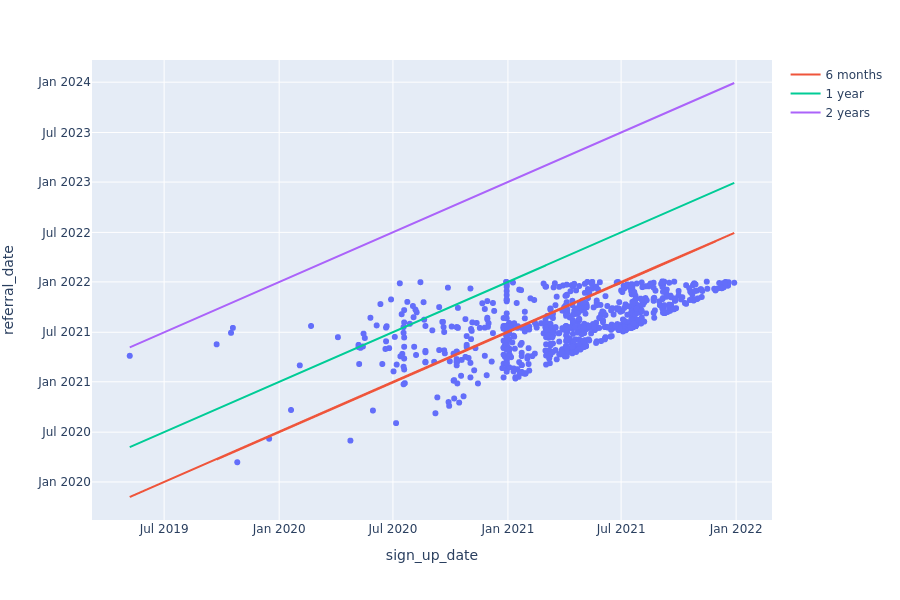

In [28]:


fig = px.scatter(data_frame=result, x= 'sign_up_date', y='referral_date', )

fig.add_trace(
    go.Scatter(x=result['sign_up_date'], y=line['sign_up_date_05y'], name="6 months", line_shape='linear')
)

fig.add_trace(
    go.Scatter(x=result['sign_up_date'], y=line['sign_up_date_1y'], name="1 year", line_shape='linear')
)
fig.add_trace(
    go.Scatter(x=result['sign_up_date'], y=line['sign_up_date_2y'], name="2 years", line_shape='linear')
)
fig.show()

The data suggests that the majority of customers refer others within the first 6 months after signing up. However, it is important to acknowledge that this conclusion may be biased due to the green energy provider being new to the market. As most customers signed up after January 2021, they are also relatively new to the provider. Therefore, a more comprehensive analysis is required to draw accurate and meaningful conclusions.

In [29]:
result["time_diff_ref"]=(result['referral_date']-result['sign_up_date']).dt.days

In [30]:
result.dtypes

customer_id                      int64
sign_up_date            datetime64[ns]
sign_up_channel                 object
referral_date           datetime64[ns]
referral_customer_id             int64
time_diff_ref                    int64
dtype: object

In [31]:
result.sort_values('time_diff_ref',ascending=False )

customer_id sign_up_date           sign_up_channel referral_date  \
433          790   2019-05-07          Provider Website    2021-04-06   
820          291   2019-10-19  Price Comparison Website    2021-07-17   
447           12   2019-10-16  Price Comparison Website    2021-06-29   
470          446   2019-09-23          Provider Website    2021-05-18   
544          205   2020-07-12  Price Comparison Website    2021-12-27   
..           ...          ...                       ...           ...   
385          176   2021-12-12                  Referral    2021-12-12   
459          250   2021-09-13                  Referral    2021-09-13   
457          615   2021-11-07                  Referral    2021-11-07   
41           383   2021-10-25          Provider Website    2021-10-25   
648          506   2021-09-17                  Referral    2021-09-17   

     referral_customer_id  time_diff_ref  
433                  1762            700  
820                  1180            637  
447                   882            622  
470                  1357            603  
544                  1089            533  
..                    ...            ...  
385                  1054              0  
459                  1138              0  
457                  1552              0  
41                   1284              0  
648                  1429              0  

[832 rows x 6 columns]

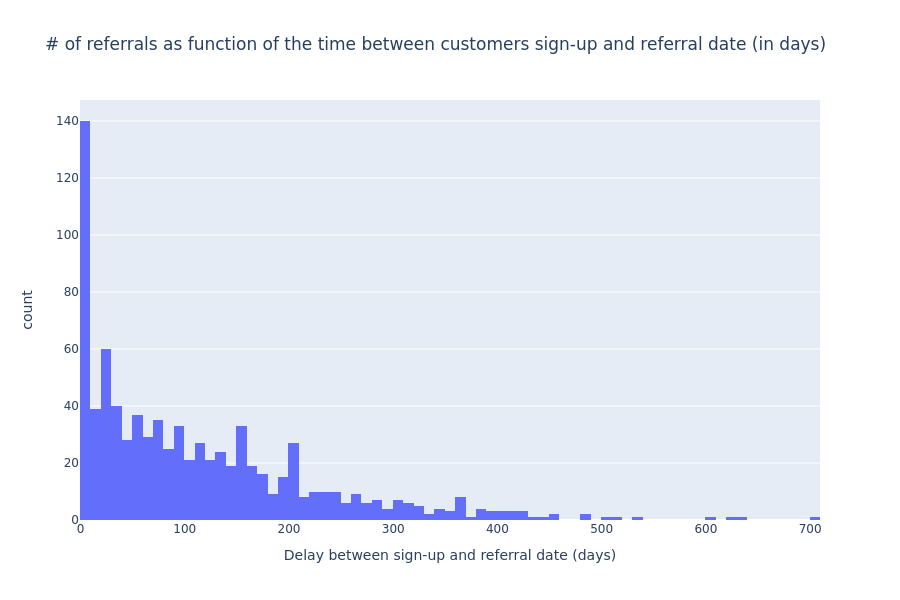

In [32]:
px.histogram(data_frame=result, x='time_diff_ref',
             labels={
                     "time_diff_ref": "Delay between sign-up and referral date (days)",
                 },
             nbins=100, title='# of referrals as function of the time between customers sign-up and referral date (in days)', )

In [33]:
np.median(result.time_diff_ref)

83.5

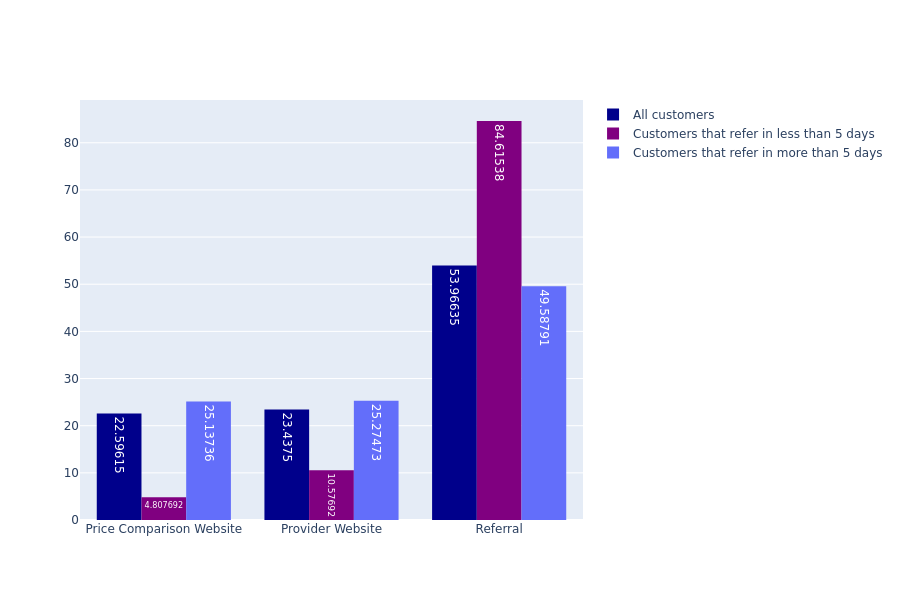

In [34]:
fig1=px.histogram(data_frame=result, x='sign_up_channel', histnorm='percent' , 
                  barmode='group', labels= 'all', text_auto=True)

fig2=px.histogram(data_frame=result[result.time_diff_ref<5], x='sign_up_channel'
                  , histnorm='percent',labels='5 days or less', text_auto=True)
fig3=px.histogram(data_frame=result[result.time_diff_ref>=5], x='sign_up_channel'
                  , histnorm='percent',labels='5 days or more', text_auto=True)
fig2.update_traces(marker=dict(color = 'purple'))
fig1.update_traces(marker=dict(color = 'darkblue'))

fig5 = go.Figure(data=fig1.data + fig2.data+fig3.data)

fig5['data'][0]['showlegend']=True
fig5['data'][1]['showlegend']=True
fig5['data'][2]['showlegend']=True


fig5['data'][0]['name']='All customers'
fig5['data'][1]['name']='Customers that refer in less than 5 days'
fig5['data'][2]['name']='Customers that refer in more than 5 days'


fig5.show()

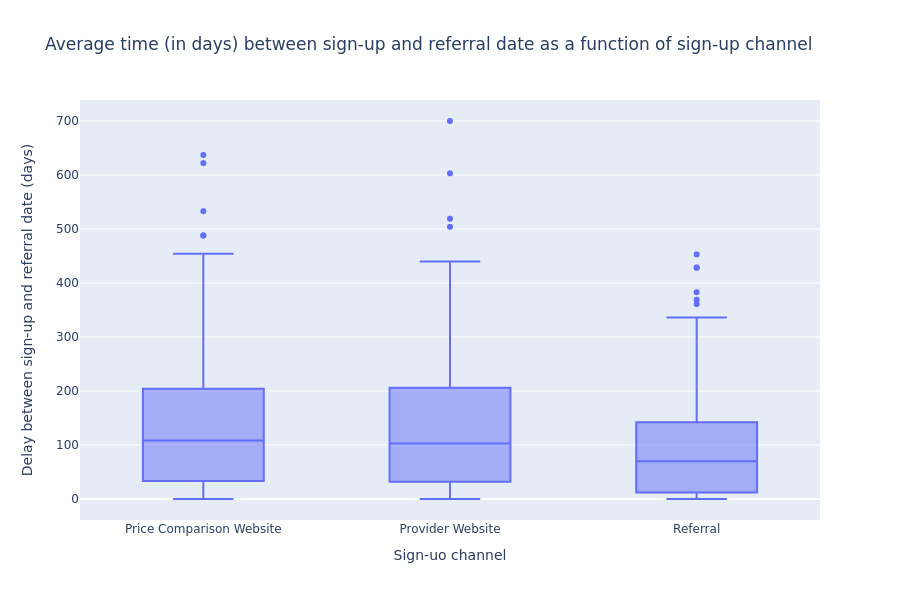

In [35]:
px.box(data_frame=result, x='sign_up_channel', y='time_diff_ref' , 
            labels={
                     "sign_up_channel": "Sign-uo channel",
                     "time_diff_ref": "Delay between sign-up and referral date (days)",
                 },
                  title ='Average time (in days) between sign-up and referral date as a function of sign-up channel',
       )

- **50% of customers who make referrals do so within 83.5 days after signing up.**
- Over 84% of customers who refer the green energy provider within 5 days came through a referral channel themselves.
- Customers who refer the fastest are predominantly coming from a referral channel.

### Does the channel members are acquired from significantly impact how they refer? Do you think we need a larger sample size to be sure?

Indeed, the way channel members refer seems to be influenced by how they were acquired. It appears that the customers who refer the most and do so the fastest are those who were initially referred themselves.


To verify this hypothesis, we plan to conduct a statistical test. We will focus on the number of days between sign-up and referral to investigate whether the sign-up channel does indeed affect this time delay.


Since the distribution of this time delay is not normal (as indicated in the previous section with the histogram), we will proceed with a non-parametric test, specifically the Kruskal-Wallis test.

**The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs. Post hoc comparisons between groups are required to determine which groups are different.**


A larger sample size is unnecessary to conduct the statistical test and reach the conclusion that the way channel members are acquired significantly influences how they refer.

In [36]:
from scipy import stats
x = result[result['sign_up_channel']=='Provider Website'].time_diff_ref.values
y = result[result['sign_up_channel']=='Price Comparison Website'].time_diff_ref.values
z = result[result['sign_up_channel']=='Referral'].time_diff_ref.values


In [37]:
stat,p_value=stats.kruskal(x, y,z)
if p_value < 0.05:
    print(f'p_value: {p_value}\nResult: There is a significant difference. The channel sign up impact how customers refer.')
else:
    print(f'p_value: {p_value}\nResult: No significant difference? The channel sign up does not impact significantly how customers refer.')

p_value: 9.75790650023935e-09
Result: There is a significant difference. The channel sign up impact how customers refer.


### We can send an email to members to invite them to refer their friends. We can choose when, and to whom, we send the emails. How would you suggest we proceed?


####  First actions : 


I would suggest to proceed as follow : 

1. **Identify the target:** Customer that signed up from Provider Website and Price Comparison Website are the one that refer the least for now, and thus are the target were there is the most potential gain. I would suggest to send an email to them.

2. **Craft a Compelling Email:** Create an engaging and persuasive email that encourages customers to refer their friends. Make sure the email is visually appealing, includes a clear call-to-action, and outlines the benefits of referring friends (e.g., discounts, rewards, exclusive offers). Personalization can also make a difference, so address customers by their names.

3. **Choose the Right Timing:** We saw that 50% of the customer refer in less than 84 days. We could make this campaign effective by targeting customers that did not refer after this timing. 

4. **Offer Incentives:** Incentives can significantly boost referral rates. Consider providing both the referrer and the friend with rewards or discounts. For example, you could offer a 10% discount to the referrer and a 10% discount to the friend on their first purchase.

####  To go futher : 

1. **Include engagement score analysis**: We could boost referral rates by segmenting customer base on engagement and satisfaction score of the customers. These are the ones who are most likely to refer their friends. Look at factors such as customer loyalty and positive feedback to determine the target audience.

2. **Track and Monitor Results:** Implement tracking mechanisms to monitor the success of the referral program. Measure the number of successful referrals, conversion rates, and the overall impact on your customer acquisition. Analyzing the data will help us understand what works best and make any necessary adjustments.

3. **Optimize and Iterate:** Based on the data and results, continuously optimize the referral program. Experiment with different incentives, email content, and timing to see what resonates best with the audience. Regularly iterate and improve to maximize the referral potential.

4. **Promote Through Various Channels:** Besides email, consider promoting the referral program through other channels, such as social media.
